#Life Expectancy

This notebook will examine factors that influence life expectancy, these factors will incude health factors and economic factors. The dataset is imported from kaggle. The data was provided by WHO and the United Nations.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('Life Expectancy Data.csv')

In [20]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


As some column names may seem ambigiuous, here is a full discription of each column:
* Country: Country
* Year: Year
* Status: Developed and developing status
* Life expectancy: Life expectancy in age
* Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
* infant deaths: Number of Infant Deaths per 1000 population
* Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
* percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
* Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
* Measles: Measles - number of reported cases per 1000 population
* BMI: Average Body Mass Index of entire population
* under_five deaths: Number of under-five deaths per 1000 population
* Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
* total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
* Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
* HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)
* GDP: Gross Domestic Product per capita (in USD)
* Population: Population of the country
* thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
* thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)
* Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* Schooling: Number of years of Schooling(years)

In [21]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [22]:
#to make column names more unifirm we will make all column names start with capital letters
df.rename(columns = {'Life expectancy ': 'Life Expectancy', 'infant deaths': 'Infant Deaths', 'percentage expenditure': 'Percentage Expenditure',
                    'under-five deaths ': 'Under-five Deaths', 'Total expenditure': 'Total Expenditure', ' thinness  1-19 years': 'Thinness 10-19 Years'
                    , ' thinness 5-9 years': 'Thinness 5-9 Years', 'Income composition of resources': 'Income Composition of Resources' }, 
          inplace = True)

In [23]:
df.head(20)

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-five Deaths,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 Years,Thinness 5-9 Years,Income Composition of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,116,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [24]:
for column in df.columns:
  print(df[column].isnull().value_counts().to_frame())

       Country
False     2938
       Year
False  2938
       Status
False    2938
       Life Expectancy
False             2928
True                10
       Adult Mortality
False             2928
True                10
       Infant Deaths
False           2938
       Alcohol
False     2744
True       194
       Percentage Expenditure
False                    2938
       Hepatitis B
False         2385
True           553
       Measles 
False      2938
        BMI 
False   2904
True      34
       Under-five Deaths
False               2938
       Polio
False   2919
True      19
       Total Expenditure
False               2712
True                 226
       Diphtheria 
False         2919
True            19
        HIV/AIDS
False       2938
        GDP
False  2490
True    448
       Population
False        2286
True          652
       Thinness 10-19 Years
False                  2904
True                     34
       Thinness 5-9 Years
False                2904
True                   3

In [25]:
df.index.size

2938

In [26]:
#we will drop all the missing values
df.dropna(subset = df.columns, axis = 0, inplace = True)

In [27]:
df.index.size

1649

In [28]:
df.describe()

,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-five Deaths,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 Years,Thinness 5-9 Years,Income Composition of Resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


### Finding the features that best influence life expectancy

In [30]:
df.corr()

,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-five Deaths,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 Years,Thinness 5-9 Years,Income Composition of Resources,Schooling
Year,1.000000,0.050771,-0.037092,0.008029,-0.113365,0.069553,0.114897,-0.053822,0.005739,0.010479,-0.016699,0.059493,0.029641,-0.123405,0.096421,0.012567,0.019757,0.014122,0.122892,0.088732
Life Expectancy,0.050771,1.000000,-0.702523,-0.169074,0.402718,0.409631,0.199935,-0.068881,0.542042,-0.192265,0.327294,0.174718,0.341331,-0.592236,0.441322,-0.022305,-0.457838,-0.457508,0.721083,0.727630
Adult Mortality,-0.037092,-0.702523,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,-0.351542,0.060365,-0.199853,-0.085227,-0.191429,0.550691,-0.255035,-0.015012,0.272230,0.286723,-0.442203,-0.421171
Infant Deaths,0.008029,-0.169074,0.042450,1.000000,-0.106217,-0.090765,-0.231769,0.532680,-0.234425,0.996906,-0.156929,-0.146951,-0.161871,0.007712,-0.098092,0.671758,0.463415,0.461908,-0.134754,-0.214372
Alcohol,-0.113365,0.402718,-0.175535,-0.106217,1.000000,0.417047,0.109889,-0.050110,0.353396,-0.101082,0.240315,0.214885,0.242951,-0.027113,0.443433,-0.028880,-0.403755,-0.386208,0.561074,0.616975
Percentage Expenditure,0.069553,0.409631,-0.237610,-0.090765,0.417047,1.000000,0.016760,-0.063071,0.242738,-0.092158,0.128626,0.183872,0.134813,-0.095085,0.959299,-0.016792,-0.255035,-0.255635,0.402170,0.422088
Hepatitis B,0.114897,0.199935,-0.105225,-0.231769,0.109889,0.016760,1.000000,-0.124800,0.143302,-0.240766,0.463331,0.113327,0.588990,-0.094802,0.041850,-0.129723,-0.129406,-0.133251,0.184921,0.215182
Measles,-0.053822,-0.068881,-0.003967,0.532680,-0.050110,-0.063071,-0.124800,1.000000,-0.153245,0.517506,-0.057850,-0.113583,-0.058606,-0.003522,-0.064768,0.321946,0.180642,0.174946,-0.058277,-0.115660
BMI,0.005739,0.542042,-0.351542,-0.234425,0.353396,0.242738,0.143302,-0.153245,1.000000,-0.242137,0.186268,0.189469,0.176295,-0.210897,0.266114,-0.081416,-0.547018,-0.554094,0.510505,0.554844
Under-five Deaths,0.010479,-0.192265,0.060365,0.996906,-0.101082,-0.092158,-0.240766,0.517506,-0.242137,1.000000,-0.171164,-0.145803,-0.178448,0.019476,-0.100331,0.658680,0.464785,0.462289,-0.148097,-0.226013


We see that there's a strong negative correlation between 'adult mortality' and 'life expectancy', which is expected as the mortality rate of adults between the age of 15 and 60 will directly influence life expectency. We also see a moderate correlation between 'alcohol' consumption, 'percentage expenditure', 'GDP' per capita, 'BMI', 'polio' and 'diphtheria' immunization and 'life expectancy'. A moderate negative correlation between 'HIV/AIDS' deaths, 'thinness 5-9 years', 'thinness 10-19 years' and 'life expectency'. And intrestingly a strong correlation between 'income composition of resources', 'schooling' and 'life expectancy'.
The next step would be finding the statistical significance of each of these features and life expectancy and plotting the regression plot of both features.

###Relationship between the adult mortality rate and life expectancy

In [31]:
from scipy import stats
r, p_val = stats.pearsonr(df['Adult Mortality'], df['Life Expectancy'])
print(f' correlation between Adult Mortality and Life Expectancy: {r}\n P value: {p_val} ')

 correlation between Adult Mortality and Life Expectancy: -0.7025230623069736
 P value: 1.3819095404866706e-245 


As we can see the P value is extremely small which means that the probability of the two features not having a relationship is extremly low.

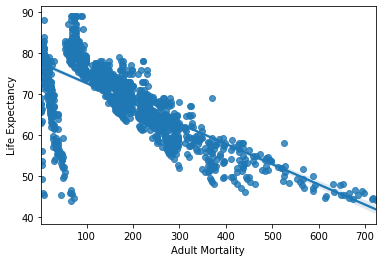

In [32]:
import seaborn as sns
sns.regplot( x = df['Adult Mortality'], y = df['Life Expectancy'])

With some outliers we can see a regression line that trends downwards. As expected, as adult mortality increases, life expectancy decreases. We will kepp this feature as a predictive feature.

###Relationship between alcohol consumption and life expectancy

In [33]:
r, p_val = stats.pearsonr(df['Alcohol'], df['Life Expectancy'])
print(f' correlation between alcohol consumption and Life Expectancy: {r}\n P value: {p_val} ')

 correlation between alcohol consumption and Life Expectancy: 0.40271832172735333
 P value: 2.5172303135310304e-65 


In [34]:
r, p_val = stats.pearsonr(df['Alcohol'], df['Life Expectancy'])
print(f' correlation between alcohol consumption and Life Expectancy: {r}\n P value: {p_val} ')

 correlation between alcohol consumption and Life Expectancy: 0.40271832172735333
 P value: 2.5172303135310304e-65 


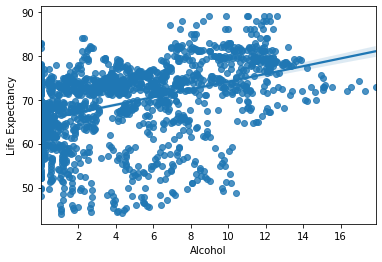

In [35]:
sns.regplot( x = df['Alcohol'], y = df['Life Expectancy'])

Even though there is a somewhat moderate correlation between alcohol consumption and life expectancy and the P value is very low (wich by itself if unusual since studies show alcohol consumption can be detrimental to health) the scatter plot shows that the points are scattered all over the place which means that alcohol is a very unlikely candidate to predict life expectancy in this case. We will discard this feature from our predictive features.

###Relationship between precentage expenditure and life expectancy

In [36]:
r, p_val = stats.pearsonr(df['Percentage Expenditure'], df['Life Expectancy'])
print(f' correlation between percentage expenditure and Life Expectancy: {r}\n P value: {p_val} ')

 correlation between percentage expenditure and Life Expectancy: 0.4096308241250478
 P value: 9.73802169690795e-68 


89.0
18961.3486


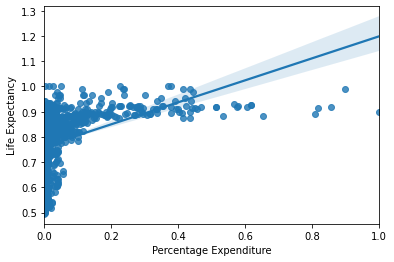

In [37]:
print(df['Life Expectancy'].max())
print(df['Percentage Expenditure'].max())
#since these values vary significantly, we will normalize them so no feature will overtake our plot
life_expect_norm = df['Life Expectancy']/df['Life Expectancy'].max()
percentage_expenditure_norm = df['Percentage Expenditure']/df['Percentage Expenditure'].max()
sns.regplot(x = percentage_expenditure_norm, y = life_expect_norm)

We can see that there is no linear relationship between the two features. which means large health expenditure doesn't necessarly mean higher life expectancy. We will discard this feature as a predictive variable.

###Relationship between GDP and life expectancy

In [38]:
r, p_val = stats.pearsonr(df['GDP'], df['Life Expectancy'])
print(f' correlation between GDP and Life Expectancy: {r}\n P value: {p_val} ')

 correlation between GDP and Life Expectancy: 0.44132180991356523
 P value: 1.4962818696925958e-79 


89.0
119172.7418


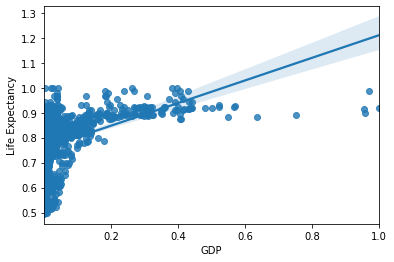

In [39]:
print(df['Life Expectancy'].max())
print(df['GDP'].max())
#since these values vary significantly, we will normalize them so no feature will overtake our plot
life_expect_norm = df['Life Expectancy']/df['Life Expectancy'].max()
gdp_norm = df['GDP']/df['GDP'].max()
sns.regplot(x = gdp_norm, y = life_expect_norm)

According to the graph, there isn't a strong enough relationship between GDP per capita and life expectancy. We will discard this feature.

###Relationship between BMI and life expectancy

In [40]:
r, p_val = stats.pearsonr(df[' BMI '], df['Life Expectancy'])
print(f' correlation between BMI and Life Expectancy: {r}\n P value: {p_val} ')

 correlation between BMI and Life Expectancy: 0.542041587691577
 P value: 1.4003480867742567e-126 


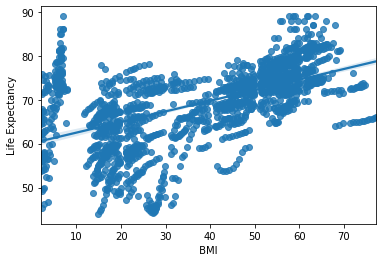

In [41]:
sns.regplot( x = df[' BMI '], y = df['Life Expectancy'])

Even though the scatter points might seem somewhat upward trending, the points will do a poor job in predincting life expectancy as the error between actual values and predicted values (regression line) will be significant. We will discard this feature as a potential predictive variable.

###Relationship between Polio immunization and life expectancy

In [42]:
r, p_val = stats.pearsonr(df['Polio'], df['Life Expectancy'])
print(f' correlation between Polio and Life Expectancy: {r}\n P value: {p_val} ')

 correlation between Polio and Life Expectancy: 0.32729440310492874
 P value: 1.7942501657557742e-42 


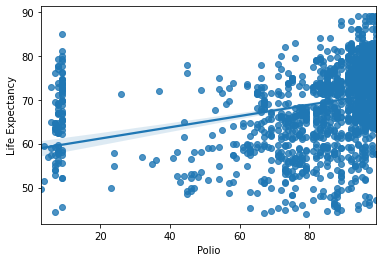

In [43]:
sns.regplot( x = df['Polio'], y = df['Life Expectancy'])

No relationship whatsoever between polio vaccinations and life expectancy. We will discard this feature.

###Relationship between Diphtheria immunization and life expectancy

In [44]:
r, p_val = stats.pearsonr(df['Diphtheria '], df['Life Expectancy'])
print(f' correlation between Diphtheria and Life Expectancy: {r}\n P value: {p_val} ')

 correlation between Diphtheria and Life Expectancy: 0.34133123426064094
 P value: 2.8617743705068703e-46 


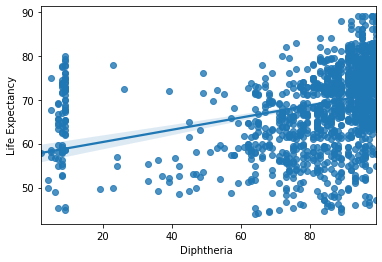

In [45]:
sns.regplot( x = df['Diphtheria '], y = df['Life Expectancy'])

According to the graph, Diphtheria is not a good predictor. We will discard this feature. 

###Relationship between HIV/AIDS deaths immunization and life expectancy

In [46]:
r, p_val = stats.pearsonr(df[' HIV/AIDS'], df['Life Expectancy'])
print(f' correlation between HIV/AIDS and Life Expectancy: {r}\n P value: {p_val} ')

 correlation between HIV/AIDS and Life Expectancy: -0.5922362925926368
 P value: 1.1096720103598573e-156 


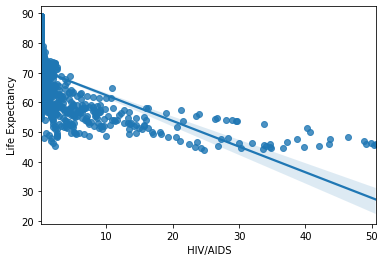

In [47]:
sns.regplot( x = df[' HIV/AIDS'], y = df['Life Expectancy'])

HIV/AIDS deaths seem like a good predictor to life expectancy. as deaths from HIV infection increases; life expectancy decreases. We will keep this feature as a potential predictor.

###Relationship between thinness age 5-9 and 10-19 and life expectancy

In [48]:
r, p_val = stats.pearsonr(df['Thinness 5-9 Years'], df['Life Expectancy'])
print(f' correlation between thinness 5-9 years and Life Expectancy: {r}\n P value: {p_val} ')

 correlation between thinness 5-9 years and Life Expectancy: -0.4575082867658003
 P value: 4.350602536969686e-86 


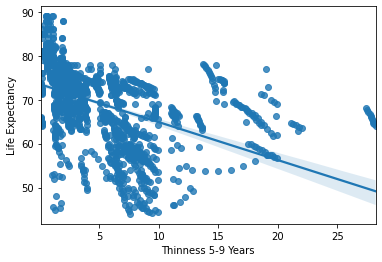

In [49]:
sns.regplot( x = df['Thinness 5-9 Years'], y = df['Life Expectancy'])

In [50]:
r, p_val = stats.pearsonr(df['Thinness 10-19 Years'], df['Life Expectancy'])
print(f' correlation between thinness 10-19 years and Life Expectancy: {r}\n P value: {p_val} ')

 correlation between thinness 10-19 years and Life Expectancy: -0.45783819334984427
 P value: 3.174107466422082e-86 


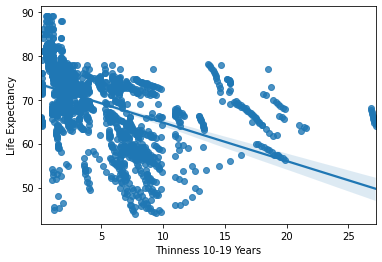

In [51]:
sns.regplot( x = df['Thinness 10-19 Years'], y = df['Life Expectancy'])

Both of these features are not good predictors according to the graph. We will discard them as potential predictors.

###Relationship between human development index in terms of income composition of resources and life expectancy

In [52]:
r, p_val = stats.pearsonr(df['Income Composition of Resources'], df['Life Expectancy'])
print(f' correlation between Income Composition of Resources and Life Expectancy: {r}\n P value: {p_val} ')

 correlation between Income Composition of Resources and Life Expectancy: 0.7210825929172888
 P value: 9.272180661997443e-265 


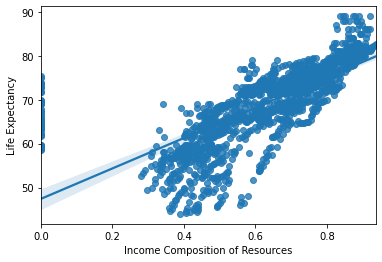

In [53]:
sns.regplot( x = df['Income Composition of Resources'], y = df['Life Expectancy'])

According to the graph, as income dispostion of resources increases; life expectancy increases. We will keep this feature as a potential predictor of life expectancy.

###Relationship between schooling and life expectancy

In [54]:
r, p_val = stats.pearsonr(df['Schooling'], df['Life Expectancy'])
print(f' correlation between Schooling and Life Expectancy: {r}\n P value: {p_val} ')

 correlation between Schooling and Life Expectancy: 0.727630032321104
 P value: 6.694044010633328e-272 


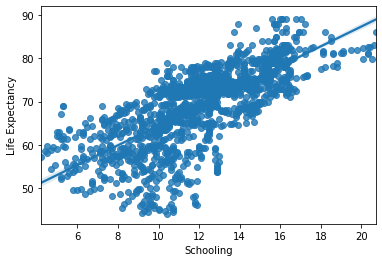

In [55]:
sns.regplot( x = df['Schooling'], y = df['Life Expectancy'])

We can see as the number of years of schooling increases; life expectancy increases. we will keep this feature as a predictive variable.

We have norrowed down our candidate predictors, now we build a predictive model that predicts that uses these features to predict life expectancy.

##Building our model

###Linear model

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x = df[['Adult Mortality', ' HIV/AIDS', 'Income Composition of Resources', 'Schooling']]
y = df['Life Expectancy']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

####Model evaluation

In [57]:
from sklearn.metrics import r2_score
y_pred = lr.predict(x_test)
r2_score(y_pred, y_test)

0.7472149462244888

###Polynomial model

In [58]:
from sklearn.preprocessing import PolynomialFeatures
r = []
for d in range(1,9):
  pr = PolynomialFeatures(degree = d)
  p_train = pr.fit_transform(x_train)
  p_test = pr.transform(x_test)
  poly = LinearRegression()
  poly.fit(p_train, y_train)
  y_pred = poly.predict(p_test)
  score = r2_score(y_pred, y_test)
  r.append(score)

Model evaluation

Text(0.5, 1.0, 'Degree VS R²')

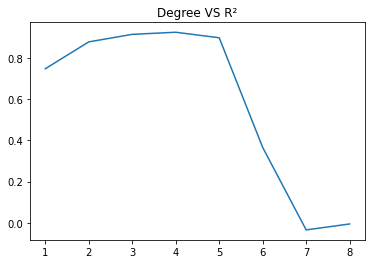

In [59]:
plt.plot( range(1, 9), r)
plt.title('Degree VS R²')

In [60]:
  pr = PolynomialFeatures(degree = 4)
  p_train = pr.fit_transform(x_train)
  p_test = pr.transform(x_test)
  poly = LinearRegression()
  poly.fit(p_train, y_train)
  y_pred = poly.predict(p_test)
  r2_score(y_pred, y_test)

0.9242684861157355

We can see that our model performs best at prediction at a polynomial degre of 4.

##Conclusion
The polynomial regression model performs better than linear regression. The features adult mortality, AIDS/HIV deaths, income composition of resources and schooling are good estimates for life expectancy. We notice that it takes a combination of economic, health and social (education) variables to influence llife expectancy.